In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd

In [3]:
data=pd.read_csv("dataset-employee.csv")
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
required_columns=['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','MonthlyIncome','NumCompaniesWorked']
df=data[required_columns]
df

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyIncome,NumCompaniesWorked
0,8,6,4,0,5993,8
1,10,10,7,1,5130,1
2,7,0,0,0,2090,6
3,8,8,7,3,2909,1
4,6,2,2,2,3468,9
...,...,...,...,...,...,...
1465,17,5,2,0,2571,4
1466,9,7,7,1,9991,4
1467,6,6,2,0,6142,1
1468,17,9,6,0,5390,2


In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.1, max_iter = 10000)
gmm.fit(df)

GaussianMixture(max_iter=10000, n_components=2, tol=0.1)

In [8]:
gmm.means_.flatten()

array([7.35780621e+00, 5.10790183e+00, 3.65228544e+00, 1.30587459e+00,
       4.40197265e+03, 2.49469787e+00, 1.96670156e+01, 1.10722043e+01,
       5.46319486e+00, 4.07381065e+00, 1.09961984e+04, 3.11772294e+00])

In [15]:
Gaussian_nr=1
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    Gaussian_nr += 1

Gaussian 1: μ = 7.4, σ = 3.9, weight = 0.68
Gaussian 2: μ = 5.1, σ = 3.1, weight = 0.32


C:\Users\admin\AppData\Local\Temp/ipykernel_11824/1209675015.py:2: RuntimeWarning: invalid value encountered in sqrt
  for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):


In [11]:
y_gmm=gmm.predict(df)

In [12]:
y_gmm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'MonthlyIncome')

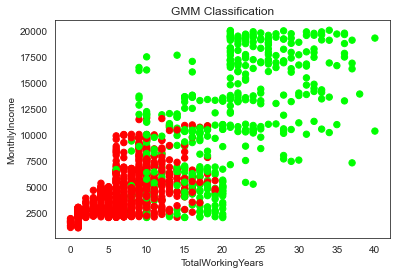

In [14]:
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(df.TotalWorkingYears, df.MonthlyIncome, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')